Dataset naruto shipuden

In [2]:
# importação das bibliotecas
import pandas as pd  # biblioteca para manipulação de dados
import matplotlib.pyplot as plt  # biblioteca para criação de gráficos
import seaborn as sns  # biblioteca para visualizações estatísticas
from sklearn.metrics.pairwise import cosine_similarity  # biblioteca para cálculo de similaridade entre vetores

In [ ]:
df = pd.read_csv("naruto.csv", encoding="latin-1")
df.head(5)

,Unnamed: 0,Num_episode,Title,Type,Year_launch,Rate,Votes,Saga,Airdate
0,1,1,Homecoming,Mixed Canon/Filler,2007,8.2,728,s1 Kazekage Rescue,2007-02-15
1,2,2,The Akatsuki Makes Its Move,Mixed Canon/Filler,2007,8.0,575,s1 Kazekage Rescue,2007-02-15
2,3,3,The Results of Training,Mixed Canon/Filler,2007,8.0,508,s1 Kazekage Rescue,2007-02-22
3,4,4,The Jinchuriki of the Sand,Mixed Canon/Filler,2007,8.2,517,s1 Kazekage Rescue,2007-03-01
4,5,5,The Kazekage Stands Tall,Mixed Canon/Filler,2007,8.2,486,s1 Kazekage Rescue,2007-03-15


In [ ]:
# entendendo a tabela
# 'unnamed: 0': índice automático gerado ao salvar o arquivo, semelhante a uma chave primária. (Será descartada)
# 'num_episode': número do episódio.
# 'title': nome do episódio.
# 'type': tipo do episódio (mixed/filler/canon).
# 'year_launch': ano de lançamento do episódio.
# 'rate': nota dada pelos espectadores.
# 'votes': número de votos recebidos.
# 'saga': temporada.
# 'airdate': data de exibição do episódio.

In [4]:
# limpeza de dados: excluindo coluna irrelevante
df.drop(columns='Unnamed: 0', inplace=True)

# exibindo informações sobre o dataframe após a limpeza
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_episode  500 non-null    int64  
 1   Title        500 non-null    object 
 2   Type         500 non-null    object 
 3   Year_launch  500 non-null    int64  
 4   Rate         500 non-null    float64
 5   Votes        500 non-null    int64  
 6   Saga         500 non-null    object 
 7   Airdate      500 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


In [5]:
# resumo estatístico das colunas numéricas
df.describe()

,Num_episode,Year_launch,Rate,Votes
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2011.668000,7.360600,369.586000
std,144.481833,2.899412,1.056836,271.742906
min,1.000000,2007.000000,4.200000,163.000000
25%,125.750000,2009.000000,6.500000,216.750000
50%,250.500000,2012.000000,7.500000,294.500000
75%,375.250000,2014.000000,8.200000,395.500000
max,500.000000,2017.000000,9.500000,2780.000000


In [6]:
# verificando quantas linhas são com valores nulos (podem interferir nas análises)
null = df.isna().sum()
null

Num_episode    0
Title          0
Type           0
Year_launch    0
Rate           0
Votes          0
Saga           0
Airdate        0
dtype: int64

In [9]:
# verificando quantas linhas são duplicadas
duplicated = df.duplicated().sum()
duplicated

0

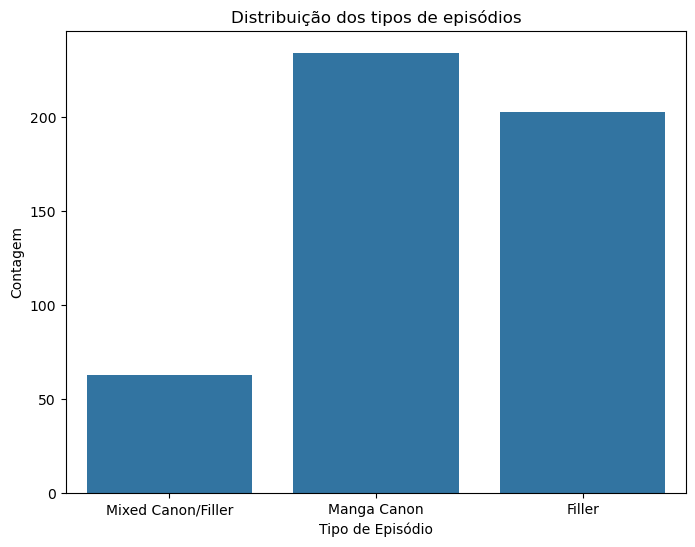

In [10]:
# gráfico de barras para distribuição dos tipos de episódios
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribuição dos tipos de episódios')
plt.xlabel('Tipo de Episódio')
plt.ylabel('Contagem')
plt.show()

In [12]:
# ordenando os episódios pelos mais votados
top_episodes = df.sort_values(by='Votes', ascending=False).head(10) 
# exibindo os top 10 episódios mais votados
top_episodes[['Title', 'Votes']]

,Title,Votes
476,Naruto and Sasuke,2780
132,The Tale of Jiraiya the Gallant,2229
374,Kakashi vs. Obito,1732
321,Madara Uchiha,1600
475,The Final Battle,1596
248,Thank You,1356
473,Congratulations,1334
477,The Unison Sign,1304
499,"Hidden Leaf Story, the Perfect Day for a Weddi...",1288
166,Planetary Devastation,1252


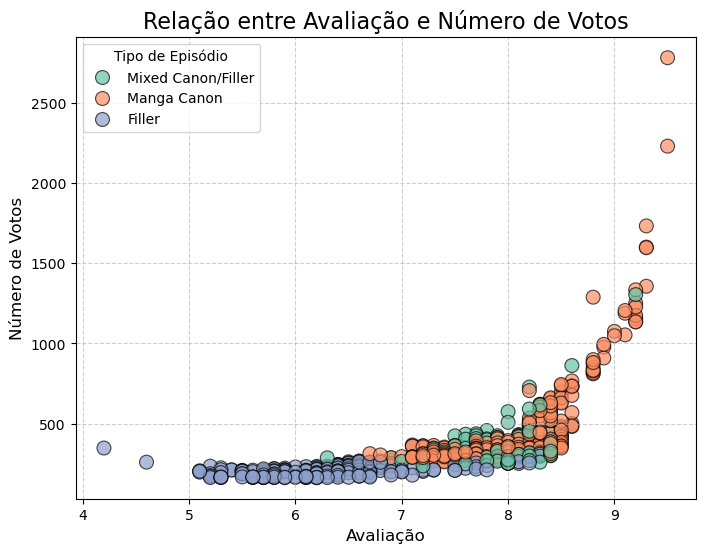

In [13]:
# gráfico de dispersão entre avaliação e número de votos
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rate', y='Votes', hue='Type', palette='Set2', s=100, edgecolor='black', alpha=0.7)
plt.title('Relação entre Avaliação e Número de Votos', fontsize=16)
plt.xlabel('Avaliação', fontsize=12)
plt.ylabel('Número de Votos', fontsize=12)
plt.legend(title='Tipo de Episódio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [14]:
# calculando a média de avaliação por tipo de episódio
average_rate_by_type = df.groupby('Type')['Rate'].mean().sort_values(ascending=False)

# imprimindo a média de avaliação por tipo de episódio com uma mensagem explicativa
print("Média de avaliação por tipo de episódio:")
print(average_rate_by_type)


Média de avaliação por tipo de episódio:
Type
Manga Canon           8.116239
Mixed Canon/Filler    7.868254
Filler                6.332020
Name: Rate, dtype: float64


In [ ]:
Modelo de recomendação simples
Passos :
1: agrupar episódios por tipo e calcular a média das avaliações (rate).
2: ordenar os tipos de episódios avaliados pela média.
3: recomendar episódios do tipo com melhor avaliação.

In [16]:
# função para recomendar episódios por tipo
def recommend_episodes_by_type(df, type, num_recommendations=3):
    # filtra os episódios pelo tipo e ordena pelas avaliações de forma decrescente
    recommended_episodes = df[df['Type'] == type].sort_values(by='Rate', ascending=False).head(num_recommendations)
    return recommended_episodes
    # exemplo de uso da função
recommended_episodes = recommend_episodes_by_type(df, 'Filler', num_recommendations=3)['Title']

# exibe os resultados
print("episódios de filler mais recomendados:")
print(recommended_episodes)



Episódios de filler mais recomendados:
357    Kakashi: Shadow of the ANBU Black Ops  Coup D...
467                                        The Successor
347                                     The New Akatsuki
Name: Title, dtype: object


In [18]:
# função para recomendar episódios por tipo
def recommend_episodes_by_type(df, type, num_recommendations=3):
    return df[df['Type'] == type].sort_values(by='Rate', ascending=False).head(num_recommendations)['Title']

# exibe os episódios recomendados diretamente
print("episódios de Manga Canon mais recomendados:")
print(recommend_episodes_by_type(df, 'manga canon', num_recommendations=3))

Episódios de Manga Canon mais recomendados:
476                  Naruto and Sasuke
132    The Tale of Jiraiya the Gallant
475                   The Final Battle
Name: Title, dtype: object
